## Import Libraries

In [1]:
import numpy as np

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D,Flatten,Dropout
import matplotlib.pyplot as plt

## Import preloaded cifar dataset from keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


## Checking shape of the Data

In [3]:
x_train.shape

(50000, 32, 32, 3)

50000--> nos of rows  
(32,32) --> nos of pixels  
3 for RGB channels

# Define the classes

In [4]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

airplane


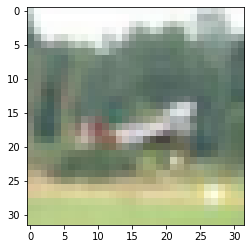

In [5]:
sample=np.random.randint(len(x_train))
plt.imshow(x_train[sample])
print(classes[y_train[sample][0]])

In [6]:
# scaling the input
X_train,X_test=x_train/255,x_test/255

# Steps in CNN:  
1) Model Creation  (Conv,relu,pooling,flatten,ANN)  
2)model compilation  
3)model fitting

# Model Creation

In [7]:
# Convolution layer
model=Sequential()

#cnn layer 1
model.add(Conv2D(filters=32,kernel_size=2,padding='valid',activation='relu'))
model.add(MaxPool2D())

#cnn layer 2
model.add(Conv2D(filters=64,kernel_size=2,padding='valid',activation='relu'))
model.add(MaxPool2D())

#cnn layer 3
model.add(Conv2D(filters=96,kernel_size=2,padding='valid',activation='relu'))
model.add(MaxPool2D())

#Flatten the output of pooling before feeding to ANN
model.add(Flatten())

#fully connected layer or ANN
#hidden layers
model.add(Dense(160,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(80,activation='sigmoid'))
model.add(Dropout(0.3))

model.add(Dense(40,activation='relu'))
model.add(Dropout(0.3))


#output layer
model.add(Dense(10,activation='softmax'))

## Model Compilation

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

## Early Stopping callback

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
call=EarlyStopping(monitor='val_loss',min_delta=1e-5,patience=5,verbose=1,restore_best_weights=True)

## Fitting the model

In [11]:
model.fit(X_train,y_train,batch_size=32,epochs=70,callbacks=call,validation_data=(X_test,y_test))

Epoch 1/70
1563/1563 [==============================] - 20s 5ms/step - loss: 1.9184 - accuracy: 0.2624 - val_loss: 1.5070 - val_accuracy: 0.4393
Epoch 2/70
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5126 - accuracy: 0.4448 - val_loss: 1.3335 - val_accuracy: 0.5201
Epoch 3/70
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3535 - accuracy: 0.5127 - val_loss: 1.1805 - val_accuracy: 0.5771
Epoch 4/70
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2472 - accuracy: 0.5598 - val_loss: 1.1525 - val_accuracy: 0.5872
Epoch 5/70
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1677 - accuracy: 0.5921 - val_loss: 1.0605 - val_accuracy: 0.6267
Epoch 6/70
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0956 - accuracy: 0.6197 - val_loss: 1.0302 - val_accuracy: 0.6395
Epoch 7/70
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0385 - accuracy: 0.6421 - val_loss: 0.9531 - val_accuracy

# Saving the model

In [13]:
model.save('cifar10_78.h5')

## Loading a Saved model

In [15]:
from tensorflow import keras
import numpy as np

In [16]:
my_model=keras.models.load_model('/content/cifar10_78.h5')

# Predicting using the model

frog


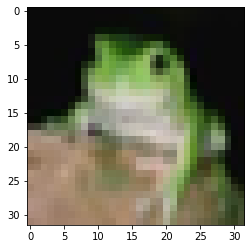

In [26]:
sample=np.random.randint(len(X_test))
plt.imshow(X_test[sample])
y_prob=my_model.predict(X_test)[sample]
y_pred=np.argmax(y_prob)
print(classes[y_pred])